CHINA Dataset

In [105]:
import numpy as np
import pandas as pd
import os
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

C_population = r'/Users/ravindra1/Downloads/CHINApopulation.csv'
C_populationgrowth = r'/Users/ravindra1/Downloads/CHINApopulationgrowth.csv'
C_consumption = r'/Users/ravindra1/Downloads/CHINAconsumption.csv'
C_govconsumption = r'/Users/ravindra1/Downloads/CHINAgovconsumption.csv'
C_unemployemnt = r'/Users/ravindra1/Downloads/CHINAunemployemnt.csv'
C_gni = r'/Users/ravindra1/Downloads/CHINAgni.csv'

C_lending = r'/Users/ravindra1/Downloads/CHINAlending.csv'
C_inflation = r'/Users/ravindra1/Downloads/CHINAinflation.csv'

#   FOR HEATMAP, CORRELATION INDEPENDENT VAR CHECK
#   https://www.geeksforgeeks.org/data-science/create-a-correlation-matrix-using-python/

pd.set_option('display.max_rows', None)
#  Expected Value  y
china_consumption = pd.read_csv(C_consumption)

#  Predictor Value X
china_population = pd.read_csv(C_population)
china_govconsumption = pd.read_csv(C_govconsumption)
china_growth = pd.read_csv(C_populationgrowth)
china_unemployment = pd.read_csv(C_unemployemnt)
china_gni = pd.read_csv(C_gni)

china_lending = pd.read_csv(C_lending)
china_inflation = pd.read_csv(C_inflation)

china_consumption

,Year,Households and NPISHs Final consumption expenditure (current US$)
0,1994,2.498404e+11
1,1995,3.378229e+11
2,1996,4.072190e+11
3,1997,4.445997e+11
4,1998,4.722490e+11
5,1999,5.103289e+11
6,2000,5.721215e+11
7,2001,6.174711e+11
8,2002,6.701835e+11
9,2003,7.208002e+11


US Dataset

In [89]:
U_population = r'/Users/ravindra1/Downloads/USpopulation.csv'
U_populationgrowth = r'/Users/ravindra1/Downloads/USpopulationgrowth.csv'
U_consumption = r'/Users/ravindra1/Downloads/USconsumption.csv'
U_govconsumption = r'/Users/ravindra1/Downloads/USgovconsumption.csv'
U_unemployemnt = r'/Users/ravindra1/Downloads/USunemployment.csv'
U_gni = r'/Users/ravindra1/Downloads/USgni.csv'

U_inflation = r'/Users/ravindra1/Downloads/USinflation.csv'
U_lending = r'/Users/ravindra1/Downloads/USlending.csv'

#  Expected Value  y
us_consumption = pd.read_csv(U_consumption)

#  Predictor Value X
us_population = pd.read_csv(U_population)
us_govconsumption = pd.read_csv(U_govconsumption)
us_growth = pd.read_csv(U_populationgrowth)
us_unemployment = pd.read_csv(U_unemployemnt)
us_gni = pd.read_csv(U_gni)

us_inflation = pd.read_csv(U_inflation)
us_lending = pd.read_csv(U_lending)



MERGING THE DATASET

In [91]:

def keep_second_column(df):
    new_df = df.iloc[:, [0, 1]]       # keep first column (Year) and second column
    new_df.columns = ["Year", new_df.columns[1]]   # rename first column to "Year"
    return new_df

df1_clean = keep_second_column(china_population)
df2_clean = keep_second_column(china_govconsumption)
df3_clean = keep_second_column(china_growth)
df4_clean = keep_second_column(china_unemployment)
df5_clean = keep_second_column(china_gni)
df6_clean = keep_second_column(china_inflation)
df7_clean = keep_second_column(china_lending)

u1c = keep_second_column(us_population)
u2c = keep_second_column(us_govconsumption)
u3c = keep_second_column(us_growth)
u4c = keep_second_column(us_unemployment)
u5c = keep_second_column(us_gni)
u6c = keep_second_column(us_inflation)
u7c = keep_second_column(us_lending)


# ---- Step 2: Merge all dataframes by Year ----

dfs = [df1_clean, df2_clean, df3_clean, df4_clean, df5_clean, df6_clean, df7_clean]
ufs = [u1c, u2c, u3c, u4c, u5c, u6c, u7c]

china_merged = dfs[0]
for d in dfs[1:]:
    china_merged = china_merged.merge(d, on="Year", how="inner")
    
us_merged = ufs[0]
for u in ufs [1:]:
    us_merged = us_merged.merge(u, on="Year", how='inner')


# Choose your independent variables
log_vars = [
    'GNI (current US$)',
    'Population, total',
    'General government final consumption expenditure (current US$)',
    'Lending interest rate (%)',
    'Unemployment, total (% of total labor force) (modeled ILO estimate)',
    'Inflation, consumer prices (annual %)'
]

# Check for zero or negative values
print(china_merged[log_vars].min())

# Apply log transform safely
for col in log_vars:
    china_merged[f'log_{col}'] = np.log(china_merged[col].replace(0, np.nan)) 

for col in log_vars:
    us_merged[f'log_{col}'] = np.log(us_merged[col].replace(0, np.nan)) 

us_merged

GNI (current US$)                                                      5.658946e+11
Population, total                                                      1.191835e+09
General government final consumption expenditure (current US$)         8.075075e+10
Lending interest rate (%)                                              4.350000e+00
Unemployment, total (% of total labor force) (modeled ILO estimate)    2.900000e+00
Inflation, consumer prices (annual %)                                 -1.401473e+00
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Year,"Population, total",General government final consumption expenditure (current US$),Population growth (annual %),"Unemployment, total (% of total labor force) (modeled ILO estimate)",GNI (current US$),"Inflation, consumer prices (annual %)",Lending interest rate (%),log_GNI (current US$),"log_Population, total",log_General government final consumption expenditure (current US$),log_Lending interest rate (%),"log_Unemployment, total (% of total labor force) (modeled ILO estimate)","log_Inflation, consumer prices (annual %)"
0,1994,263126000,1108101000000,1.226296,6.119,7310202000000,2.607442,7.138333,29.620292,19.388144,27.733669,1.965479,1.811399,0.958370
1,1995,266278000,1141743000000,1.190787,5.650,7667701000000,2.805420,8.829167,29.668038,19.400051,27.763577,2.178061,1.731656,1.031553
2,1996,269394000,1172889000000,1.163412,5.451,8103991000000,2.931204,8.270833,29.723378,19.411686,27.790491,2.112735,1.695799,1.075413
3,1997,272657000,1220529000000,1.203960,5.000,8600853000000,2.337690,8.441667,29.782883,19.423725,27.830305,2.133180,1.609438,0.849163
4,1998,275854000,1267608000000,1.165715,4.511,9080228000000,1.552279,8.354167,29.837120,19.435382,27.868153,2.122760,1.506519,0.439724
5,1999,279040000,1351428000000,1.148340,4.219,9662075000000,2.188027,7.994167,29.899230,19.446866,27.932183,2.078712,1.439598,0.783000
6,2000,282162411,1437588000000,1.112769,3.992,10289432000000,3.376857,9.233333,29.962138,19.457993,27.993988,2.222820,1.384292,1.216945
7,2001,284968955,1538151000000,0.989741,4.731,10632293000000,2.826171,6.921667,29.994917,19.467891,28.061602,1.934657,1.554137,1.038923
8,2002,287625193,1645818000000,0.927797,5.783,10974902000000,1.586032,4.675000,30.026632,19.477169,28.129259,1.542229,1.754923,0.461235
9,2003,290107933,1746378000000,0.859482,5.989,11514946000000,2.270095,4.122500,30.074667,19.485764,28.188565,1.416460,1.789924,0.819822


<Axes: xlabel='Unemployment Rate', ylabel='Household consumption expenditure (including Non-profit institutions serving households)'>

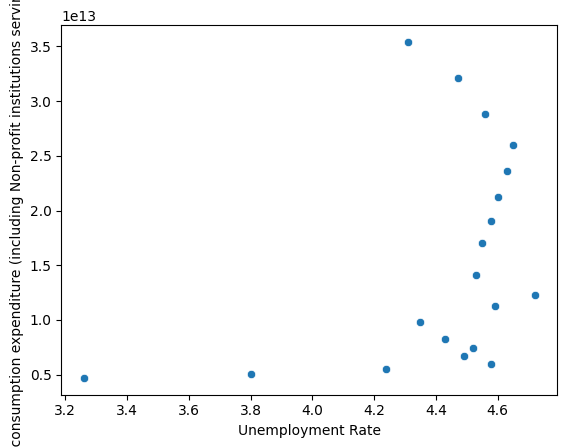

In [ ]:
y = china_consumption['Household consumption expenditure (including Non-profit institutions serving households)']

x1 = merged['Population(in millions)']
x2 = merged['General government final consumption expenditure (current US$)']
x3 = merged['Population Growth Rate']   # r = -0,31591526
x4 = merged['Unemployment Rate']    # r = 0,3719063
x5 = merged['GNI (current US$)']
x6 = merged['GNI per capita, Atlas method (current US$)']
x7 = merged['Population_absolute']
x8 = merged['Gov_spending_per_capita']

corr = np.corrcoef(x8, y)

sns.scatterplot(x=x4, y=y)

CORRELATION MATRIX / HEATMAP

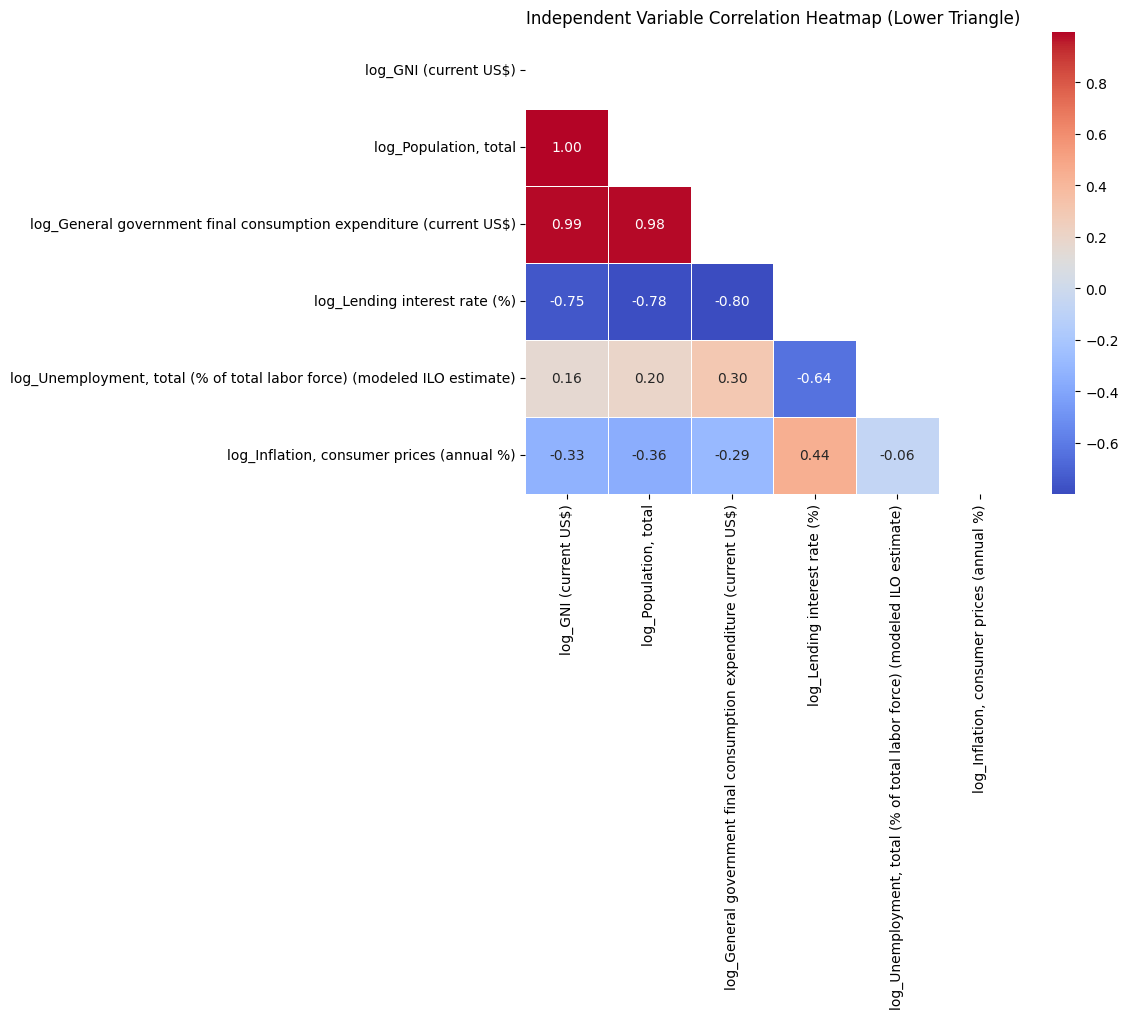

In [95]:
coreck = [
    'log_GNI (current US$)',
    'log_Population, total',
    'log_General government final consumption expenditure (current US$)',
    'log_Lending interest rate (%)',
    'log_Unemployment, total (% of total labor force) (modeled ILO estimate)',
    'log_Inflation, consumer prices (annual %)'
]

corr_check = us_merged[coreck].copy()

matrix = corr_check.corr()

mask = np.triu(np.ones_like(matrix, dtype=bool))   # mask upper triangle

plt.figure(figsize=(8,6))
sns.heatmap(
    matrix, 
    annot=True, 
    cmap="coolwarm", 
    fmt=".2f", 
    linewidths=0.5,
    mask=mask
)
plt.title("Independent Variable Correlation Heatmap (Lower Triangle)")
plt.show()

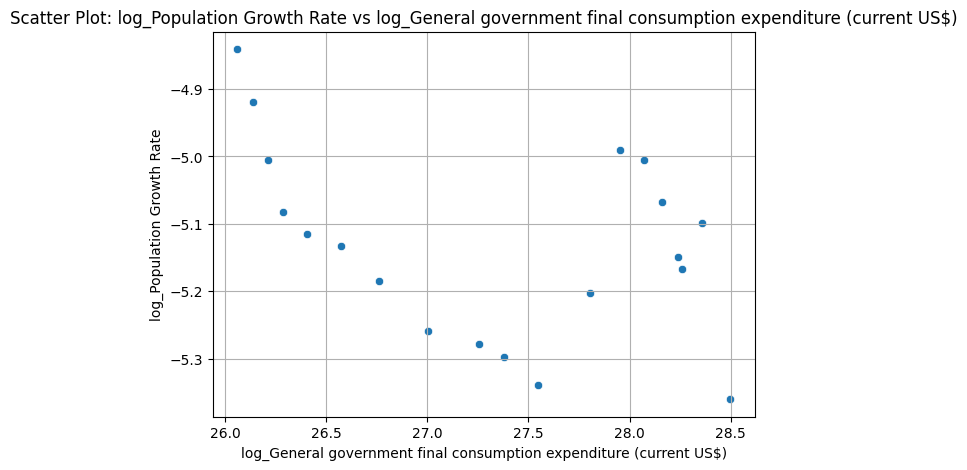

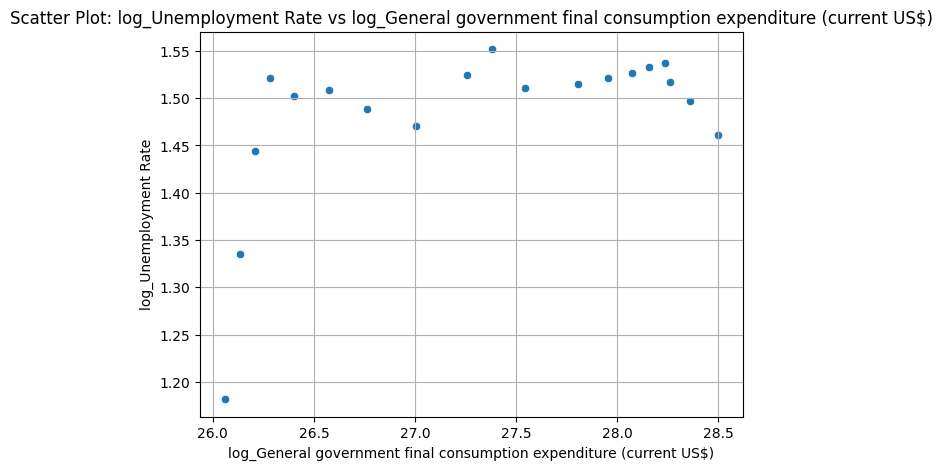

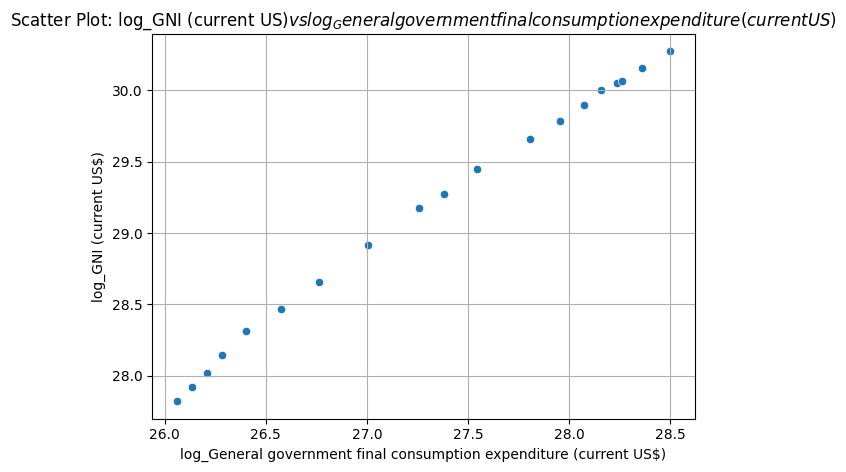

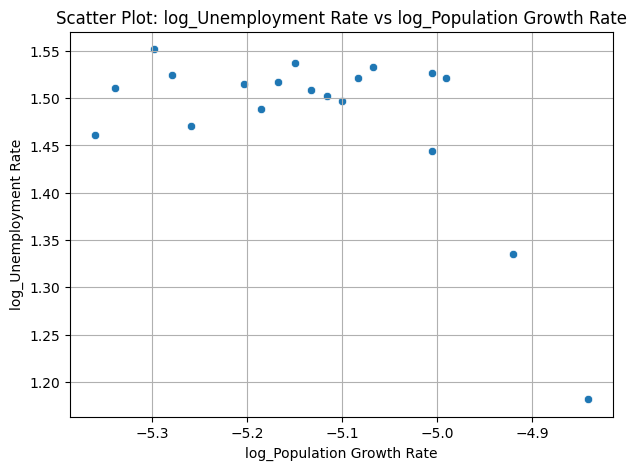

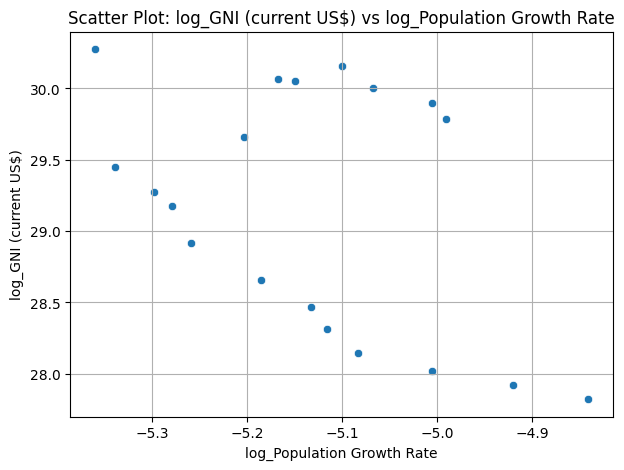

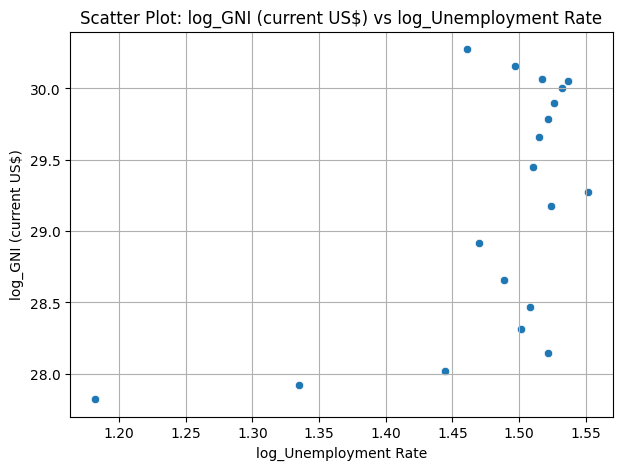

In [ ]:
    # 'Population(in millions)',
    # 'General government final consumption expenditure (current US$)',
    # 'Population Growth Rate',
    # 'Unemployment Rate',
    # 'GNI (current US$)'

c1 = merged['Population(in millions)']
c2 = merged['General government final consumption expenditure (current US$)']
c3 = merged['Population Growth Rate']
c4 = merged['Unemployment Rate']
c5 = merged['GNI (current US$)']

import matplotlib.pyplot as plt
import seaborn as sns
import itertools

def scatter_all_pairs(df, var_list):
    """
    Create scatter plots for all unique pairs in var_list.
    Example: if var_list has 5 vars, this produces 10 scatter plots.

    Parameters:
        df (DataFrame): dataset
        var_list (list): list of variables to scatter-plot
    """

    pairs = itertools.combinations(var_list, 2)  # all unique pairs

    for x, y in pairs:
        plt.figure(figsize=(7,5))
        sns.scatterplot(data=df, x=x, y=y)
        plt.title(f"Scatter Plot: {y} vs {x}")
        plt.xlabel(x)
        plt.ylabel(y)
        plt.grid(True)
        plt.show()

variables = [
    'log_General government final consumption expenditure (current US$)',
    'log_Population Growth Rate',
    'log_Unemployment Rate',
    'log_GNI (current US$)'
]

scatter_all_pairs(merged, variables)


In [102]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df, variables):
    """
    Calculate VIF for a list of independent variables.
    
    Parameters:
        df: DataFrame containing your data
        variables: list of column names you want to calculate VIF for
    
    Returns:
        DataFrame with VIF values
    """
    X = df[variables].copy()
    X = sm.add_constant(X)  # Add intercept for VIF calculation

    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                       for i in range(X.shape[1])]
    
    return vif_data

variables = [
    'GNI (current US$)',
    'Population, total',
    'General government final consumption expenditure (current US$)',
    'Lending interest rate (%)',
    'Unemployment, total (% of total labor force) (modeled ILO estimate)',
    'Inflation, consumer prices (annual %)'

    # 'log_GNI (current US$)',
    # 'log_Population, total',
    # 'log_General government final consumption expenditure (current US$)',
    # 'log_Lending interest rate (%)',
    # 'log_Unemployment, total (% of total labor force) (modeled ILO estimate)',
    # 'log_Inflation, consumer prices (annual %)'
]

vif_result = calculate_vif(us_merged, variables)
print(vif_result)


                                            Variable         VIF
0                                              const    0.000000
1                                  GNI (current US$)  177.151717
2                                  Population, total  189.810974
3  General government final consumption expenditu...  100.813743
4                          Lending interest rate (%)    4.893711
5  Unemployment, total (% of total labor force) (...    6.652509
6              Inflation, consumer prices (annual %)    1.565493


/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [119]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

# 1. Combine dependent + predictors into one dataframe
df = us_merged.copy()
df['HCE'] = us_consumption['Households and NPISHs Final consumption expenditure (current US$)']

# 2. Fit OLS regression model with corrected formula
formula = '''
HCE ~ 
    Q("log_GNI (current US$)") + 
    Q("log_Population, total") +
    Q("log_General government final consumption expenditure (current US$)") +
    Q("log_Lending interest rate (%)") +
    Q("log_Unemployment, total (% of total labor force) (modeled ILO estimate)") +
    Q("log_Inflation, consumer prices (annual %)")
'''

model = smf.ols(formula=formula, data=df).fit()

# 3. ANOVA table
anova_results = anova_lm(model, typ=2)
#print(anova_results)

# 4. Regression summary
#print(model.summary())

model = smf.ols(formula, data=df).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    HCE   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     298.2
Date:                Sat, 22 Nov 2025   Prob (F-statistic):           2.93e-16
Time:                        12:58:20   Log-Likelihood:                -665.61
No. Observations:                  24   AIC:                             1345.
Df Residuals:                      17   BIC:                             1353.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------